In [101]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import pycountry

import warnings
warnings.filterwarnings('ignore')

In [102]:
forest_km = pd.read_csv('forest_area_km.csv', usecols=['Country Name', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
forest_percent = pd.read_csv('forest_area_percent.csv', usecols=['Country Name', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
air = pd.read_csv('AQI and Lat Long of Countries.csv')
countries_inf = pd.read_csv('world-data-2023.csv')

In [103]:
forest_km.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,12084.400,12084.40,12084.400,12084.40,12084.400,12084.4,12084.400,12084.4,12084.4,12084.4,12084.400
1,Albania,7834.935,7849.17,7863.405,7877.64,7891.875,7891.8,7889.025,7889.0,7889.0,7889.0,7889.000
2,Algeria,19256.000,19332.00,19408.000,19484.00,19560.000,19560.0,19430.000,19300.0,19390.0,19490.0,19583.333
3,American Samoa,174.000,173.70,173.400,173.10,172.800,172.5,172.200,171.9,171.6,171.3,171.000
4,Andorra,160.000,160.00,160.000,160.00,160.000,160.0,160.000,160.0,160.0,160.0,160.000


In [104]:
forest_percent.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782
1,Albania,28.594653,28.646606,28.698558,28.750511,28.802464,28.802190,28.792062,28.791971,28.791971,28.791971,28.791971
2,Algeria,0.808485,0.811675,0.814866,0.818057,0.821248,0.821248,0.815790,0.810332,0.814110,0.818309,0.822228
3,American Samoa,87.000000,86.850000,86.700000,86.550000,86.400000,86.250000,86.100000,85.950000,85.800000,85.650000,85.500000
4,Andorra,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553


In [105]:
air.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [106]:
countries_inf.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


## Исследование мирового леса

Так как в датасете присутствует информация с 1992 года, то было принято решение взять период с 2011 по 2021, т.е. 10 лет.

Для удобства переименуем колонку "Country Name"

In [107]:
forest = forest_km.rename(columns={'Country Name':'Country'})
forest_percent = forest_percent.rename(columns={'Country Name':'Country'})

Для начала посмотрим, как изменялась площадь лесов со временем.

По графикам видно, что площадь мирового леса стремительно упала на примерно 400 тыс. км2 и на 0.4%.

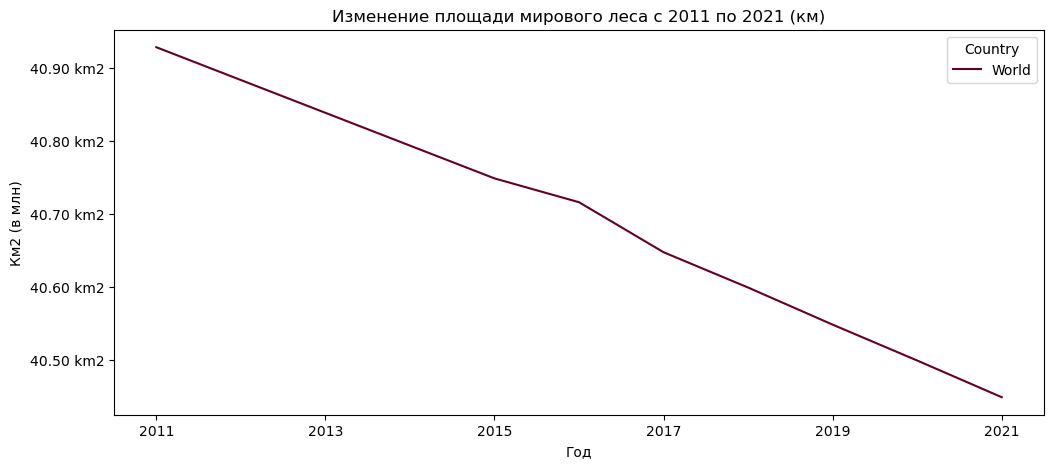

In [108]:
fig, ax = plt.subplots(figsize=(12,5))
world = forest[forest["Country"] == "World"].set_index("Country").transpose() / 1000000
world.plot(colormap="RdBu", ax=ax)
ax.yaxis.set_major_formatter('{x:.2f} km2')
plt.title("Изменение площади мирового леса с 2011 по 2021 (км)")
plt.xlabel('Год')
plt.ylabel('Км2 (в млн)')
plt.show()

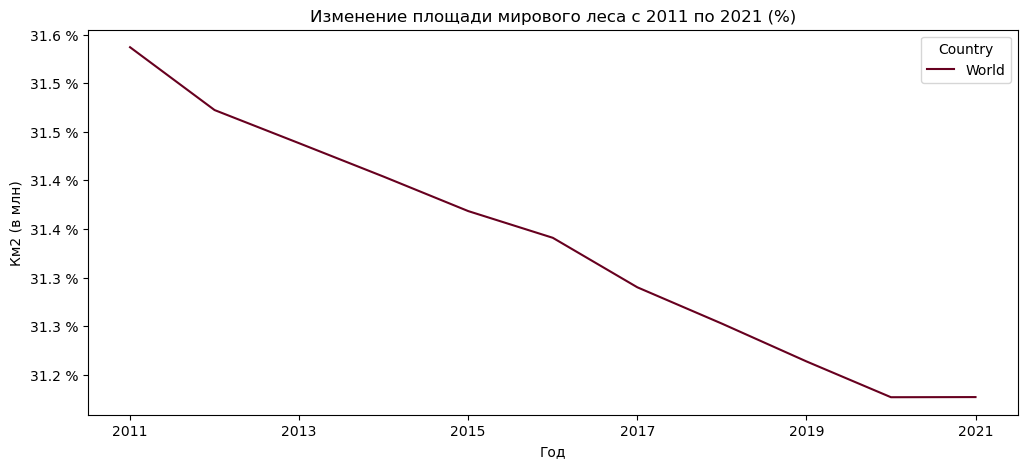

In [109]:
fig, ax = plt.subplots(figsize=(12,5))
world_2 = forest_percent[forest_percent["Country"] == "World"].set_index("Country").transpose()
world_2.plot(colormap="RdBu", ax=ax)
ax.yaxis.set_major_formatter('{x:,.1f} %')
plt.title("Изменение площади мирового леса с 2011 по 2021 (%)")
plt.xlabel('Год')
plt.ylabel('Км2 (в млн)')
plt.show()

Далее рассмотрим насколько изменилась площадь лесов с 2011 года по 2021 год в странах.

Также оставим информацию о тех странах, где произошли изменения.

В датафрейме присутствуют не только страны, но и регионы, поэтому воспользуемся библиотекой *pycountry*, чтобы оставить информацию только о государствах.

In [110]:
countries = []
for country in pycountry.countries:
    countries.append(country.name)

country = forest[forest["Country"].isin(countries)]
country_per = forest_percent[forest_percent["Country"].isin(countries)]

Графики показывают, что самый большой прирост лесов произошел:
- в км2: в Китае (193106 км2),
- в %: в Гуаме (7.04%).

Наибольшая убыль лесов произошла:
- в км2: в Бразилии (146502 км2),
- в %: в Комбоджи (13.19%).

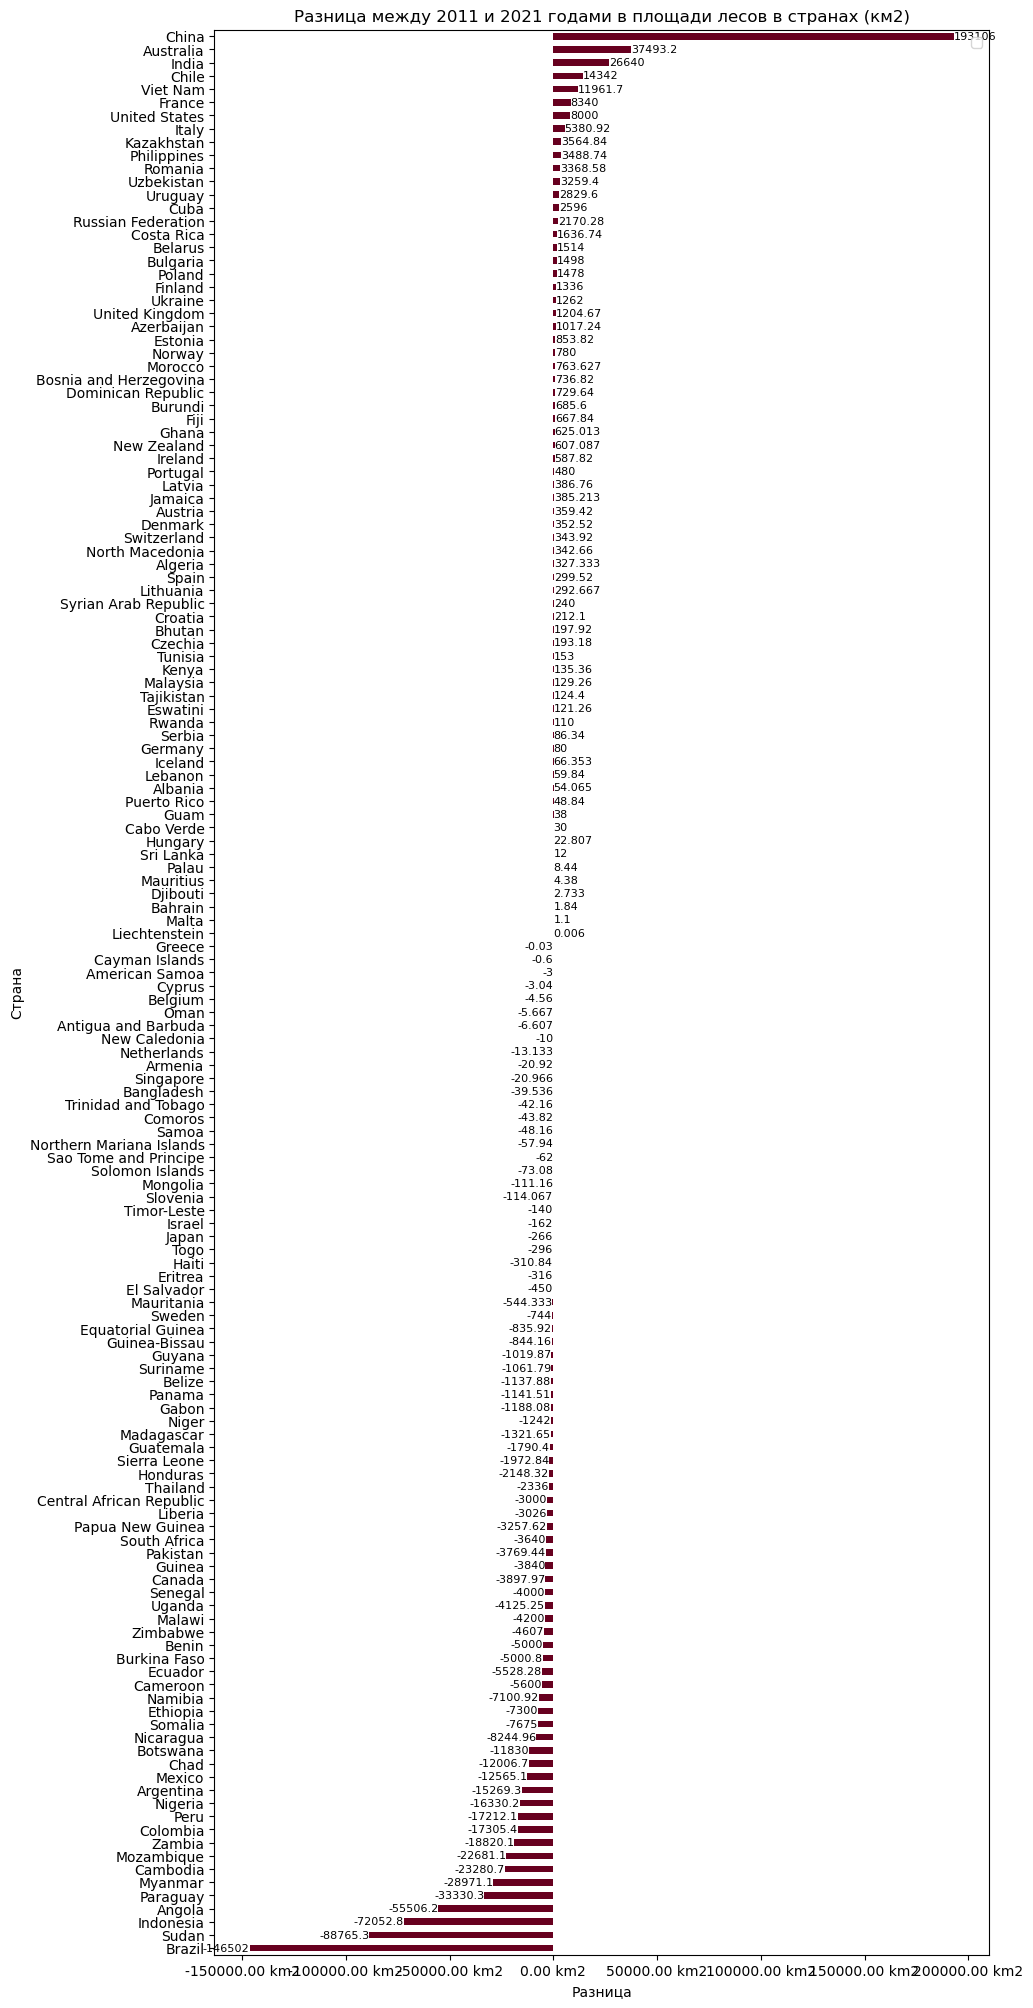

In [111]:
c_diff = country[['Country', '2011', '2021']].set_index("Country").transpose().diff().sum().reset_index(name="change").query('change!=0')
ax = c_diff.sort_values("change").plot.barh(x="Country", y="change", figsize=(10, 25), colormap="RdBu")
ax.bar_label(ax.containers[0], fontsize=8)
plt.title("Разница между 2011 и 2021 годами в площади лесов в странах (км2)")
plt.xlabel("Разница")
plt.ylabel('Страна')
plt.legend("")
ax.xaxis.set_major_formatter('{x:.2f} km2')
plt.show()

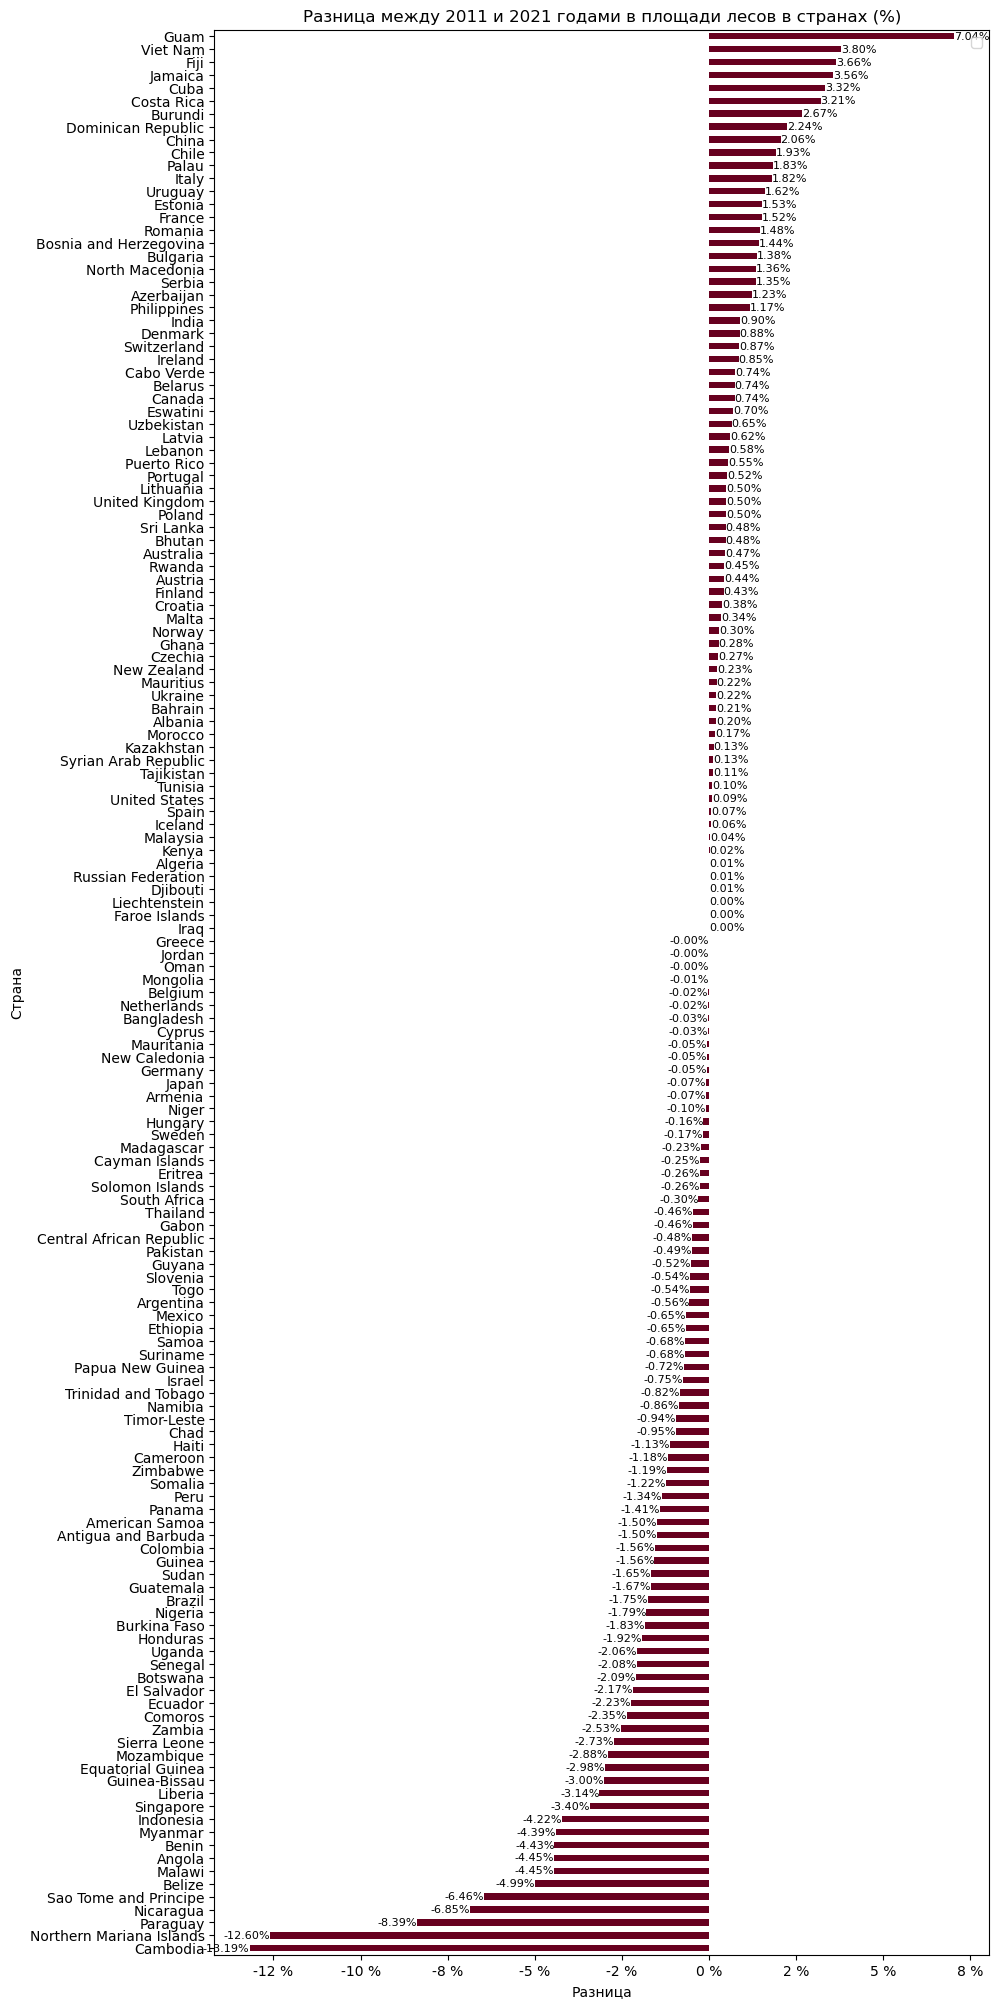

In [112]:
c_diff_2 = country_per[['Country', '2011', '2021']].set_index("Country").transpose().diff().sum().reset_index(name="change").query('change!=0')
ax = c_diff_2.sort_values("change").plot.barh(x="Country", y="change", figsize=(10, 25), colormap="RdBu")
ax.bar_label(ax.containers[0], fontsize=8, fmt='%.2f%%')
plt.title("Разница между 2011 и 2021 годами в площади лесов в странах (%)")
plt.xlabel("Разница")
plt.ylabel('Страна')
plt.legend("")
ax.xaxis.set_major_formatter('{x:,.00f} %')
plt.show()

Посмотрим на топ 10 стран по площади в 2021 году.

По площади в км2 однозначными лидерами являются:
1. Россия.
2. Бразилия.
3. Канада.
4. США.
5. Китай.

В % от территории страны:
1. Суринам.
2. Гайана.
3. Габон.
4. Палау.
5. Соломоновы о-ва.

In [113]:
top_forest = country[['Country', '2021']].sort_values('2021', ascending=False).round(2).head(10)
fig = px.pie(values=top_forest['2021'], names=top_forest['Country'],
             color_discrete_sequence=px.colors.sequential.RdBu, 
             title='Топ 10 стран по площади лесов в 2021 году (км2)'
             )
fig.update_traces(textposition='outside', 
                  textinfo='value+label',
                  marker=dict(line=dict(color='#FFFFFF', width=2)),
                  textfont_size=12)
fig.update_layout(
    autosize=False,
    width=1000,
    height=600
)
fig.show()

In [114]:
top_forest_per = country_per[['Country', '2021']].sort_values('2021', ascending=False).round(2).head(10)
fig = px.pie(values=top_forest_per['2021'], names=top_forest_per['Country'],
             color_discrete_sequence=px.colors.sequential.RdBu, 
             title='Топ 10 стран по площади лесов в 2021 году (%)'
             )
fig.update_traces(textposition='outside', 
                  textinfo='value+label',
                  marker=dict(line=dict(color='#FFFFFF', width=2)),
                  textfont_size=12)
fig.update_layout(
    autosize=False,
    width=1000,
    height=600
)
fig.show()

## Глобальная информация о странах.

Для начала проведем предобработку данных, изменив тип даннх на числовой где возможно. 

In [115]:
countries_inf = countries_inf.replace(r"%", "", regex=True)
countries_inf = countries_inf.replace(r",", "", regex=True)
countries_inf = countries_inf.replace({'\$':''}, regex = True)
cols = countries_inf.columns
countries_inf[cols] = countries_inf[cols].apply(pd.to_numeric, errors='ignore')

In [116]:
countries_inf.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


In [117]:
country_inf = countries_inf[countries_inf["Country"].isin(countries)]

Особое внимание нужно обратить на те факторы, которые по логике связаны с площадью лесов:
- Co2-Emissions - выбросы CO2 (в тоннах).

Лидеры:
1. Китай.
2. США.
3. Индия.
4. Япония.

Меньше всего выбросов:
1. Тувалу.
2. Лихтенштейн.
3. Кирибати.
4. Тонга.

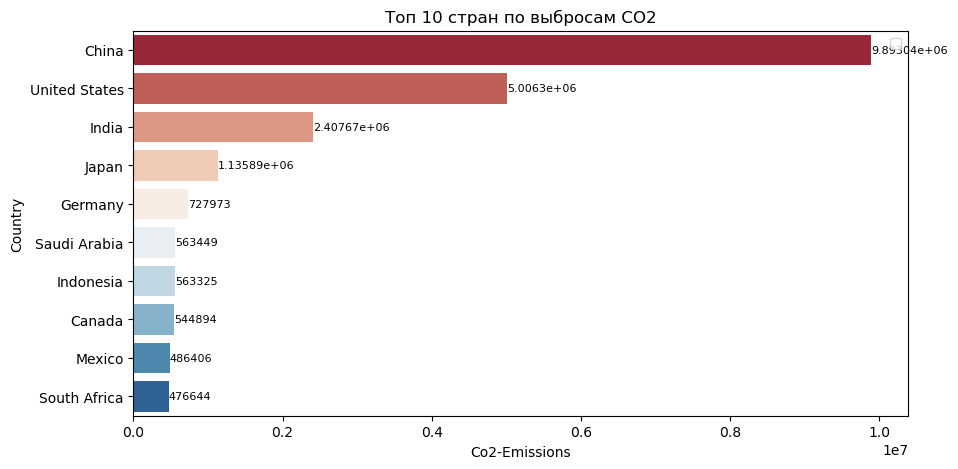

In [118]:
country_inf_co2_top = country_inf.sort_values('Co2-Emissions', ascending=False).head(10)
plt.figure(figsize=(10,5))
ax = sns.barplot(data=country_inf_co2_top, x='Co2-Emissions', y='Country', palette='RdBu')
ax.bar_label(ax.containers[0], fontsize=8)
plt.title("Топ 10 стран по выбросам CO2")
plt.legend("")
plt.show()

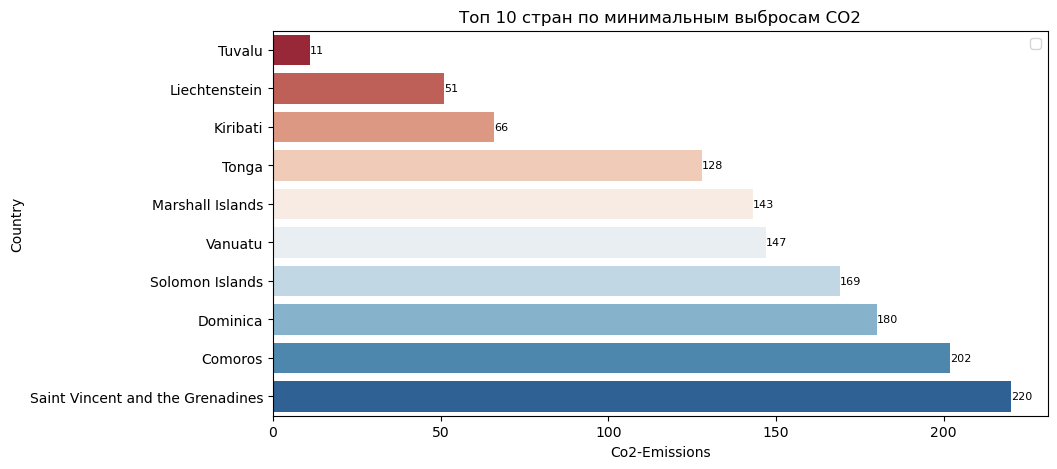

In [119]:
country_inf_co2_bottom = country_inf.sort_values('Co2-Emissions').head(10)
plt.figure(figsize=(10,5))
ax = sns.barplot(data=country_inf_co2_bottom, x='Co2-Emissions', y='Country', palette='RdBu')
ax.bar_label(ax.containers[0], fontsize=8)
plt.title("Топ 10 стран по минимальным выбросам CO2")
plt.legend("")
plt.show()

## Лес и глобальная информация о странах.

In [120]:
countries_2021 = country[['Country', '2021']].rename(columns={'2021':'forest(km2)'})
forest_percent = forest_percent[['Country', '2021']].rename(columns={'2021':'forest(%)'})

In [121]:
full_inf = countries_2021.merge(forest_percent, on='Country')
full_inf_1 = full_inf.merge(countries_inf, on='Country')

In [122]:
full_inf_1.head()

,Country,forest(km2),forest(%),Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,12084.400,1.852782,60,AF,58.1,652230.0,323000.0,32.49,93.0,...,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,7889.000,28.791971,105,AL,43.1,28748.0,9000.0,11.78,355.0,...,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,19583.333,0.822228,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,...,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,160.000,34.042553,164,AD,40.0,468.0,NaN,7.20,376.0,...,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,Angola,660523.133,52.981722,26,AO,47.5,1246700.0,117000.0,40.73,244.0,...,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


Рассмотрим корреляцию площади лесов с различными факторами стран.

Можно заметить корелляцию с: 

Площадь леса в км2:
- Площадью гос-ва.
- ВВП.
- Городским населением.
- Выбросами CO2.
- Вооруженными силами.
- Популяцией.

Площадь леса в %:
- Сельскохозяйственными землями (%).
- Площадью леса (%).

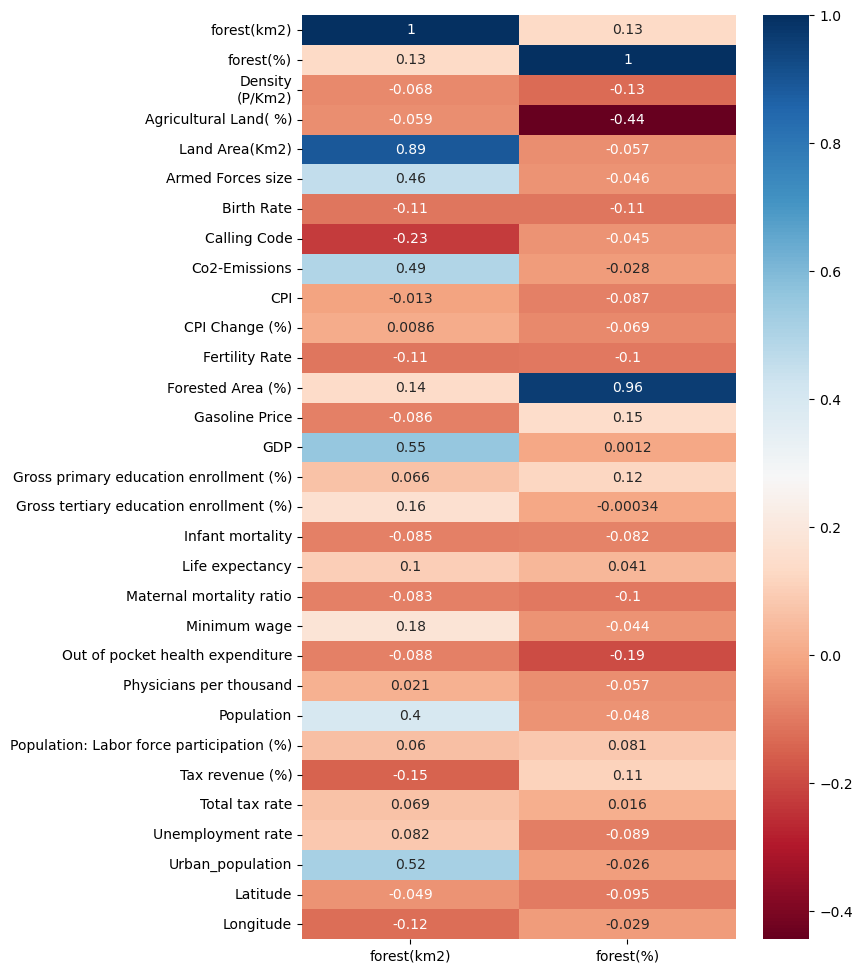

In [123]:
plt.figure(figsize=(7,12))
sns.heatmap(full_inf_1.select_dtypes(include=[np.number]).corr()[['forest(km2)', 'forest(%)']], annot=True, cmap='RdBu')
plt.show()

## Качество воздуха.

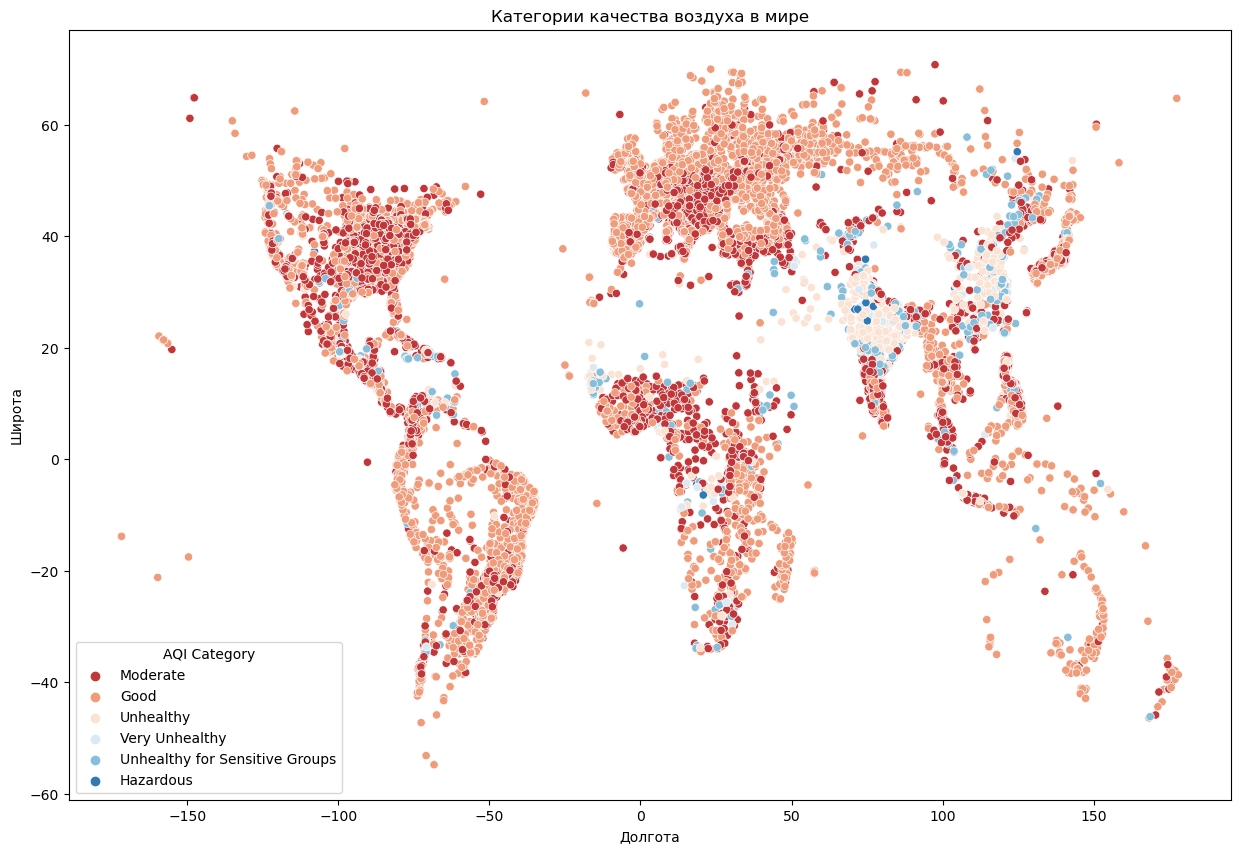

In [124]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=air, x='lng', y='lat', hue='AQI Category', palette='RdBu')
plt.title('Категории качества воздуха в мире')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

## Лес и качество воздуха.

Так как информация в датафрейме дает информацию по городам, то для каждой страны посчитаем средние показатели.

In [125]:
air_country = air.groupby("Country")[["AQI Value", "CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]].mean().round(2).reset_index()

In [126]:
full_inf_2 = full_inf.merge(air_country, on="Country")

In [127]:
full_inf_2.head()

,Country,forest(km2),forest(%),AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
0,Afghanistan,12084.400,1.852782,86.33,0.33,42.00,0.00,86.33
1,Albania,7889.000,28.791971,77.11,1.00,42.56,0.56,76.56
2,Algeria,19583.333,0.822228,106.25,4.00,35.00,25.75,106.25
3,Andorra,160.000,34.042553,32.00,1.00,32.00,0.00,24.00
4,Angola,660523.133,52.981722,85.00,3.38,23.19,2.24,82.52


Рассмотрим корреляцию площади лесов с различными факторами частоты воздуха.

Можно заметить корелляцию с:

Площадь леса в км2:
- Корреляция не замечена.

Площадь леса в %:
- Индексом качества воздуха.
- Индексом качества воздуха PM2.5.
- Индексом качества воздуха озона.

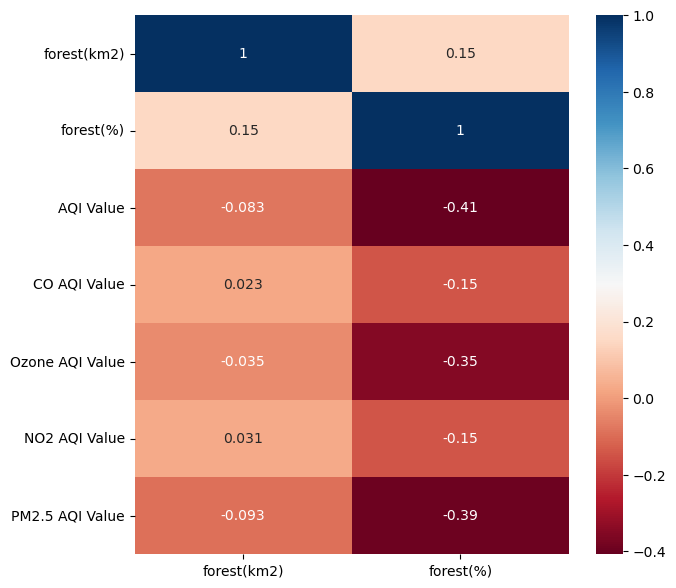

In [128]:
plt.figure(figsize=(7,7))
sns.heatmap(full_inf_2.select_dtypes(include=[np.number]).corr()[['forest(km2)', 'forest(%)']], annot=True, cmap='RdBu')
plt.show()